# TEAM : GOPALBHANR

In [ ]:
!pip install openai
!pip install transformers
!pip install Sentence_transformers
!pip install python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.8 MB/s eta

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from openai import OpenAI
import re
import plotly.graph_objects as go

from transformers import AutoTokenizer, AutoModelForMaskedLM
from sentence_transformers import SentenceTransformer
import torch
import numpy as np
import pandas as pd
from transformers import BertTokenizer, BertModel
import json
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

In [ ]:
!git clone https://github.com/the-chosen-wan/genai.git

Cloning into 'genai'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 40 (delta 17), reused 11 (delta 4), pack-reused 0
Receiving objects: 100% (40/40), 12.28 MiB | 4.24 MiB/s, done.
Resolving deltas: 100% (17/17), done.


# High Level Design

High level design :

![Alt text](https://drive.google.com/uc?id=122CLOkyg1V0Xphxa5OjnrwQS8daL9lGd "a title")

# Utils

In [ ]:
# Parameters considered
params = [
    "Resource Avaibilty",
    "Waste to product ratio",
    "Renewablity",
    "biodegradability",
    "% of Recyclable product",
    "Qualty of the waste",

    "Longevity",
    "Recyclability",
    "Cost of Repair",

    "PaaS",
    "EPR",
    "Scale of infrastructure needed",
    "Manpower needed",

    "Digital feasibility",
    "Necessity of innovation hubs",
    "Scalabilty",
    "Necessity of research on solution",

    "Environmental Impact",
    "Outlandish Idea Score",
    "Number of Maximum Cycles",
    "Return @ Cycle"
]

In [ ]:
def create_reqs(p,s):
  problem_and_solution = "\n --------- PROBLEM PROBLEM PROBLEM PROBLEM PROBLEM  --------- \n"+p+ "\n---------------------------------------------------------------------------------------------------------------------\n ----------------- SOLUTION SOLUTION SOLUTION SOLUTION SOLUTION  -----------------   \n " + s + '\n------------------------------------------------------------------------------------------------------------\n\n'

  request1 = f"""
  You are AI conversating with human. Give answer based on,

  {problem_and_solution} .

  Do NOT alter the solution in any way under any circumstance. Solution may not be grammatically or semantically accurate. It is NOT your job to fix the solution.

  Your AI tool aims to assist in evaluating ideas within the context of Circular Economy by assessing problem and solution pairs.
  Streamline the evaluation process, enhancing the accuracy and efficiency of selecting optimal solutions.
  Consider the following points and assign a score out of 10 based on relevance, feasibility, and economic aspects. Also, mention a brief explanation
  behind assigning the scores for each aspects. Always answer in this way along with explanantion and score and the vector. Dont miss any point/section.
  Providing Explanation is a MUST. Providing Explanation is a MUST. Don't be hesitant to provide a very low score. Give a low score when the point in question
  does not allign well with the solution. Be strict when evaluating the solution. Give poor score to all criteria if the solution does not bring any improvement to
  the problem.

  Criterias are below.

  Initial Assessment:
  1. Resource Mapping: Evaluate resources, materials, and energy flows. The higher the abundance of the product as resource in nature, the higher its score will be. (Score: a/10)
  2. Waste Audit: Measure and analyze the extent of wastage. To what scale waste is produced from the product, i.e. waste to product ratio. More waste means more score. (Score: b/10)

  Design for Circularity:
  3. Renewable: Discuss the use of renewable materials. The higher the product's renewable nature, the higher its score. (Score: c/10)
  4. Biodegradable: Consider biodegradable material usage. The degree of biodegradability exhibited by the product. (Score: d/10)
  5. Recyclable: Highlight the use of recyclable materials. What is the extent to which a product can be recycled without any decrease in its return?. (Score: e/10)
  6. Quality of the waste. The higher the quality, such as recovery, the higher the assigned score.  (Score: f/10)


  Create a 6 dimentional vector considering the scores following the above order. Only use integer. STRICTLY FOLLOW THE PATTERN BELLOW for 6 DIMENTIONAL vector
  Vector: [a,b,c,d,e,f]
  """


  request2 = f"""
  You are AI conversating with human. Give answer based on,

  {problem_and_solution} .

  Do NOT alter the solution in any way under any circumstance. Solution may not be grammatically or semantically accurate. It is NOT your job to fix the solution.

  Your AI tool aims to assist in evaluating ideas within the context of Circular Economy by assessing problem and solution pairs.
  Streamline the evaluation process, enhancing the accuracy and efficiency of selecting optimal solutions.
  Consider the following points and assign a score out of 10 based on relevance, feasibility, and economic aspects. Also, mention a brief explanation
  behind assigning the scores for each aspects. Always answer in this way along with explanantion and score and the vector. Dont miss any point/section.
  Providing Explanation is a MUST. Providing Explanation is a MUST. Don't be hesitant to provide a very low score. Give a low score when the point in question
  does not allign well with the solution. Be strict when evaluating the solution. Give poor score to all criteria if the solution does not bring any improvement to
  the problem.

  Criterias are below.

  Product Design:
  1. Longevity: Describe product longevity strategies. What is the Longevity of the product? higher the Longevity, the higher the score(Score: a/10)
  2. Recyclability: Explain product recyclability features. To what extent is the product can be recycled?  higher the Recyclability, the higher the score(Score: b/10)
  3. Ease of Repair: Emphasize repair-friendly design. What is the cost of repairing the residuals into a product? higher the cost, the higher the score(Score: c/10)

  Business Model Innovation:
  4. Product-as-a-Service (PaaS):
    - Lease or share products for ownership retention. (Score: d/10)

  5. Extended Producer Responsibility (EPR):
    - Focus on product maintenance responsibilities. Higher the need for maintenance, higher the score. (Score: e/10)

  6. Infrastructure Development:
    - Discuss the establishment of recycling facilities, remanufacturing centers, and collection systems. How much is the need for building factories, machineries, setup to iniate the cycle process? Higher the need, higher the score(Score: f/10)

  7. Manpower:
    - Address human resources involved in circular practices. How much people should be hired more to ensure the cycle? Higher the human resources needed , higher the score. (Score: g/10)


  Create a 7 dimentional vector considering the scores following the above order. Only use integer. STRICTLY FOLLOW THE PATTERN BELLOW for 7 DIMENTIONAL vector
  Vector: [a,b,c,d,e,f,g]
  """

  request3 = f"""
  You are AI conversating with human. Give answer based on,

  {problem_and_solution} .

  Do NOT alter the solution in any way under any circumstance. Solution may not be grammatically or semantically accurate. It is NOT your job to fix the solution.

  Your AI tool aims to assist in evaluating ideas within the context of Circular Economy by assessing problem and solution pairs.
  Streamline the evaluation process, enhancing the accuracy and efficiency of selecting optimal solutions.
  Consider the following points and assign a score out of 10 based on relevance, feasibility, and economic aspects. Also, mention a brief explanation
  behind assigning the scores for each aspects. Always answer in this way along with explanantion and score and the vector. Dont miss any point/section.
  Providing Explanation is a MUST. Providing Explanation is a MUST. Don't be hesitant to provide a very low score. Give a low score when the point in question
  does not allign well with the solution. Be strict when evaluating the solution. Give poor score to all criteria if the solution does not bring any improvement to
  the problem.

  Criterias are below.

  Technology and Innovation:
  1. Digital Solutions:
    - Explore aspects of digital solutions for circular economy practices. To what extent is the solution to the problem feasible to exist in digital form?  higher the feasibility, the higher the score.(Score: a/10)

  2. Innovation Hubs:
      - Discuss hardware and software innovation hubs. Is building Innovation Hubs necessary for implementing the idea?  higher the necessity, the higher the score.(Score: b/10)

  Scaling and Expansion:
  3. Scaling Up:
      - Expand successful circular initiatives across organizations, communities, or industries. To what extent can the solution be scaled to a larger scope?  higher the scope, the higher the score(Score: c/10)

  4. Continuous Improvement:
      - Always seek opportunities for further improvement and innovation. To what extent is research and innovation necessary to achieve the optimal performance of the solution? The higher the scope, the higher the score(Score: d/10)

  Create a 4 dimentional vector considering the scores following the above order. Only use integer. STRICTLY FOLLOW THE PATTERN BELLOW for 5 DIMENTIONAL vector
  Vector: [a,b,c,d]
  """

  request4 = f"""
  You are AI conversating with human. Give answer based on,

  {problem_and_solution} .

  Do NOT alter the solution in any way under any circumstance. Solution may not be grammatically or semantically accurate. It is NOT your job to fix the solution.

  Your AI tool aims to assist in evaluating ideas within the context of Circular Economy by assessing problem and solution pairs.
  Streamline the evaluation process, enhancing the accuracy and efficiency of selecting optimal solutions.
  Consider the following points and assign a score out of 10 based on relevance, feasibility, and economic aspects. Also, mention a brief explanation
  behind assigning the scores for each aspects. Always answer in this way along with explanantion and score and the vector. Dont miss any point/section.
  Providing Explanation is a MUST. Providing Explanation is a MUST. Don't be hesitant to provide a very low score. Give a low score when the point in question
  does not allign well with the solution. Be strict when evaluating the solution. Give poor score to all criteria if the solution does not bring any improvement to
  the problem.

  Criterias are below.

  Strength of Idea:
  1. Environmental Impact: Measure the environmental effects of the proposed ideas. (Score:  a/10)
  2. Outlandish Idea Score: Evaluate the novelty compared to existing and state-of-the-art ideas. (Score:  b/10)
  3. Number of Maximum Cycles: Assess the number of maximum cycles the idea supports. (Score:  c/10)
  4. Return @ Cycle (Damping Effect): Calculate the return considering damping effect at each cycle. (Score:  d/10)


  Create a 4 dimentional vector considering the scores following the above order. Only use integer. STRICTLY FOLLOW THE PATTERN BELLOW for 4 DIMENTIONAL vector
  Vector: [a,b,c,d]
  """

  return request1,request2,request3,request4

In [ ]:
def create_new_mergedreq(p,s):
  problem_and_solution = "\n --------- PROBLEM PROBLEM PROBLEM PROBLEM PROBLEM  --------- \n"+p+ "\n---------------------------------------------------------------------------------------------------------------------\n ----------------- SOLUTION SOLUTION SOLUTION SOLUTION SOLUTION  -----------------   \n " + s + '\n------------------------------------------------------------------------------------------------------------\n\n'

  request = f"""
  BE VERY JUDGEMENTAL. DONT TAKE THE WORDS OF THE SOLUTION AS IS. TRY TO FIND IF IT IS SUPPORTED BY DETAILS.
  READ THE WHOLE TEXT VERY CAREFULLY AND DO AS SAID. IF THE TEXT IS NON-ENGLISH THEN TREAT IT AS GARBAGE.
  EVALUATE EACH POINT ON THE BASIS OF WHETHER THE INFO IS ACTUALLY SUPPORTED BY DETAILS.
  You are AI conversating with human. Give answer based on,

  {problem_and_solution} .

  Do NOT alter the solution in any way under any circumstance. Solution may not be grammatically or semantically accurate. It is NOT your job to fix the solution.

  Your AI tool aims to assist in evaluating ideas within the context of Circular Economy by assessing problem and solution pairs.
  Streamline the evaluation process, enhancing the accuracy and efficiency of selecting optimal solutions.
  Consider the following points and assign a score out of 10 based on relevance, feasibility, and economic aspects. Also, mention a brief explanation
  behind assigning the scores for each aspects. Always answer in this way along with explanantion and score and the vector. Dont miss any point/section.
  Providing Explanation is a MUST. Providing Explanation is a MUST. Don't be hesitant to provide a very low score. Give a low score when the point in question
  does not allign well with the solution. Be strict when evaluating the solution. Give poor score to all criteria if the solution does not bring any improvement to
  the problem.

  Criterias are below.

  Initial Assessment:
  1. Resource Mapping: Evaluate resources, materials, and energy flows. The higher the abundance of the product as resource in nature, the higher its score will be. (Score: a/10)
  2. Waste Audit: Measure and analyze the extent of wastage. To what scale waste is produced from the product, i.e. waste to product ratio. More waste means more score. (Score: b/10)

  Design for Circularity:
  3. Renewable: Discuss the use of renewable materials. The higher the product's renewable nature, the higher its score. (Score: c/10)
  4. Biodegradable: Consider biodegradable material usage. The degree of biodegradability exhibited by the product. (Score: d/10)
  5. Recyclable: Highlight the use of recyclable materials. What is the extent to which a product can be recycled without any decrease in its return?. (Score: e/10)
  6. Quality of the waste. The higher the quality, such as recovery, the higher the assigned score.  (Score: f/10)


  Product Design:
  7. Longevity: Describe product longevity strategies. What is the Longevity of the product? higher the Longevity, the higher the score(Score: g/10)
  8. Recyclability: Explain product recyclability features. To what extent is the product can be recycled?  higher the Recyclability, the higher the score(Score: h/10)
  9. Ease of Repair: Emphasize repair-friendly design. What is the cost of repairing the residuals into a product? higher the cost, the higher the score(Score: i/10)

  Business Model Innovation:
  10. Product-as-a-Service (PaaS):
    - Lease or share products for ownership retention. (Score: j/10)

  11. Extended Producer Responsibility (EPR):
    - Focus on product maintenance responsibilities. Higher the need for maintenance, higher the score. (Score: k/10)

  12. Infrastructure Development:
    - Discuss the establishment of recycling facilities, remanufacturing centers, and collection systems. How much is the need for building factories, machineries, setup to iniate the cycle process? Higher the need, higher the score(Score: l/10)

  13. Manpower:
    - Address human resources involved in circular practices. How much people should be hired more to ensure the cycle? Higher the human resources needed , higher the score. (Score: m/10)


  Your AI tool aims to assist in evaluating ideas within the context of Circular Economy by assessing problem and solution pairs.
  Streamline the evaluation process, enhancing the accuracy and efficiency of selecting optimal solutions.

  Criterias are below.

  Technology and Innovation:
  14. Digital Solutions:
    - Explore aspects of digital solutions for circular economy practices. To what extent is the solution to the problem feasible to exist in digital form?  higher the feasibility, the higher the score.(Score: n/10)

  15. Innovation Hubs:
      - Discuss hardware and software innovation hubs. Is building Innovation Hubs necessary for implementing the idea?  higher the necessity, the higher the score.(Score: o/10)

  Scaling and Expansion:
  16. Scaling Up:
      - Expand successful circular initiatives across organizations, communities, or industries. To what extent can the solution be scaled to a larger scope?  higher the scope, the higher the score(Score: p/10)

  17. Continuous Improvement:
      - Always seek opportunities for further improvement and innovation. To what extent is research and innovation necessary to achieve the optimal performance of the solution? The higher the scope, the higher the score(Score: q/10)


  Your AI tool aims to assist in evaluating ideas within the context of Circular Economy by assessing problem and solution pairs.
  Streamline the evaluation process, enhancing the accuracy and efficiency of selecting optimal solutions.

  Criterias are below.

  Strength of Idea:
  18. Environmental Impact: Measure the environmental effects of the proposed ideas. (Score:  r/10)
  19. Outlandish Idea Score: Evaluate the novelty compared to existing and state-of-the-art ideas. (Score:  s/10)
  20. Number of Maximum Cycles: Assess the number of maximum cycles the idea supports. (Score:  t/10)
  21. Return @ Cycle (Damping Effect): Calculate the return considering damping effect at each cycle. (Score:  u/10)


  Create a 21 dimentional vector considering the scores following the above order.
  Only use integers between 0 to 10 inclusive.
  STRICTLY FOLLOW THE PATTERN BELLOW for 21 DIMENTIONAL vector.
  AT THE END STRICTLY FOLLOW THIS SPECIFIC FORMAT FOR THE OUTPUT. YOU MUST GIVE THIS ANSWER.

  ANSWER: [a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u]
  """

  return request

## Different Solutions By GPT

In [ ]:
def get_gpt_q(prob,specifications=[]):
    num_solns=5
    while len(specifications)<5:
        specifications.append("all the salient points from above")

    gpt_q = f"""
    Problem:
    {prob}

    You are an AI tool tasked with presenting five distinct solutions to address this problem within the realm of Circular Economy.
    Each solution should be succinct, encapsulated within 150 to 200 words.
    Feel free to draw inspiration from internet resources and current industry standards.
    Each proposed ideas should encompass aspects such as renewability, sustainability,
    longevity, recyclability, environmental impact, innovation, digital elements, and scalability.
    Present these five unique ideas concisely, following this specified pattern. Keep each idea in *** ... ### block.
    """
    for index,specification in enumerate(specifications):
        gpt_q+=f"""
        {index+1}. Solution {index+1} on the basis of {specification}
        ***
            (150-200) words
        ###
        """
    return gpt_q

## Initial Sanity check

In [ ]:
def get_sanity_check_prompt(p,s):
  sanity_check_prompt = f"""
    You are an AI tool
    Read the Paragraph1 text INSIDE @@@ and @@@.
    Read the Paragraph2 text INSIDE %%% and %%%.
    The Paragraph1 or Paragraph2 may not sound grammatical and it may contain JUNK words. Still, you DON'T alter the text.
    Strictly FOLLOW the delimiter @ and %.

    Paragraph1 starts
    @@@
    {p}
    @@@
    Paragraph1 ends


    Paragraph2 starts
    %%%
    {s}
    %%%
    Paragraph2 ends


    Your job:
    Give me a percentage for how grammatically correct paragraph 1 is . Name it as grammar_percentage1
    Give me a percentage for how grammatically correct paragraph 2 is . Name it as grammar_percentage2

    Create a vector like this. Strictly follow the format. Do not include the percentage symbol.
    Grammatical score vector: [ grammar_percentage1, grammar_percentage2 ]

    Assume paragraph 1 is problem statement and paragraph 2 is the corresponding solution.
    Tell me if paragraph 2 is applicable as a solution to paragraph 1. Name it as allignment_score. allignment_score is a string : Yes / No
    Strictly follow the format. Keep the allignment_score with brackets.
    Allignment score : ( allignment_score )
  """
  return sanity_check_prompt

In [ ]:
def extract_sanity_info(input_string):
    # Extract vector inside [ and ]
    vector, extracted_string = None, None
    vector_match = re.search(r'\[([^\]]+)\]', input_string)
    if vector_match:
        vector_str = vector_match.group(1)
        vector = [int(num.strip()) for num in vector_str.split(',')]

    # Extract string inside ( and )
    string_match = re.search(r'\(([^)]+)\)', input_string)
    if string_match:
        extracted_string = string_match.group(1)

    return vector, extracted_string

In [ ]:
# sanity_check_prompt_input = get_sanity_check_prompt(prob, sol)

In [ ]:
# print(sol)

In [ ]:
# _ = generate_content(sanity_check_prompt_input)
# grm_scores, allign_flag = extract_sanity_info(_)

# Wrapping It Up

In [ ]:
# Sparse model for encoding
class SparseModel:
  def __init__(self):
    self.DEVICE =  'cuda' if torch.cuda.is_available() else 'cpu'
    self.model = AutoModelForMaskedLM.from_pretrained("naver/splade-cocondenser-selfdistil").to(self.DEVICE)
    self.sparse_tokenizer = AutoTokenizer.from_pretrained("naver/splade-cocondenser-selfdistil")


  def decode_sparse_dict(self, sparse_dict,trim=None):
    a = np.zeros((30522))
    a[sparse_dict['indices']] = sparse_dict['values']
    if trim is not None:
      a[a.argsort()[:-trim]] = 0
    return a

  def formalize(self, sparse_dict):

    idx2token = {idx: token for token, idx in self.sparse_tokenizer.get_vocab().items()}

    sparse_dict_tokens = {
        idx2token[idx]: weight for idx, weight in zip(sparse_dict['indices'], sparse_dict['values'])
    }
    sparse_dict_tokens = {
        k: v for k, v in sorted(
            sparse_dict_tokens.items(),
            key=lambda item: item[1],
            reverse=True
        )
    }
    return sparse_dict_tokens


  def __call__(self, text):

    input_ids = self.sparse_tokenizer(text, return_tensors='pt').to(self.DEVICE)
    with torch.no_grad():
      logits = self.model(**input_ids).logits

    sparse_vec = torch.max(
        torch.log(
            1+torch.relu(logits)
        )*input_ids.attention_mask.unsqueeze(-1),
    dim=1)[0].squeeze();

    indices = sparse_vec.nonzero().squeeze().cpu().tolist()
    values = sparse_vec[indices].cpu().tolist()
    sparse_dict = {'indices': indices, 'values': values}

    return np.array(sparse_vec.cpu()),sparse_dict


# Dense bert model for encoding
class DenseModel:
  def __init__(self):
    self.DEVICE =  'cuda' if torch.cuda.is_available() else 'cpu'
    self.model = SentenceTransformer('msmarco-bert-base-dot-v5',device=self.DEVICE) #clip-ViT-B-32

  def __call__(self, text):
    dense_vec = self.model.encode(text).tolist()
    return  np.array(dense_vec)

In [ ]:
def hybrid_sim(s1,d1,s2,d2,alpha=0.5):
  # alpha dense weight
  cs = cosine_similarity([s1],[s2])[0][0]
  cd = cosine_similarity([d1],[d2])[0][0]
  return cs,cd, (1-alpha)*cs + alpha*cd

In [ ]:
# Uniqueness check: utility class to calculate the similarity b/w given solution and existing solutions in AI EarthHack Dataset.xlsx
class UniquenessChecker:
  def __init__(self, prob_path, sol_path, prob_sparse_path, sol_sparse_path):
    self.dense_model = DenseModel()
    self.sparse_model = SparseModel()

    self.problems_enc = np.load(prob_path)
    self.solutions_enc = np.load(sol_path)

    with open(prob_sparse_path, 'r') as json_file:
        self.problems_enc_sparse = json.load(json_file)

    with open(sol_sparse_path, 'r') as json_file:
        self.solutions_enc_sparse = json.load(json_file)


  def find_top_matches_sparse(self,sol_list, prob_list, given_sol,given_prob, sol_id, top_k=2,trim=None):
      # Calculate cosine similarity between given_prob and all embeddings in prob list
      cosine_similarities_sol = cosine_similarity([self.sparse_model.decode_sparse_dict(given_sol,trim)], [self.sparse_model.decode_sparse_dict(x,trim) for x in sol_list])
      cosine_similarities_prob = cosine_similarity([self.sparse_model.decode_sparse_dict(given_prob,trim)], [self.sparse_model.decode_sparse_dict(x,trim) for x in prob_list])

      # Get the indices of top k most similar embeddings in prob list
      top_indices = np.argsort(cosine_similarities_sol[0])[-top_k:][::-1]
      top_indices = top_indices[top_indices != sol_id]

      top_sim_scores_sol = cosine_similarities_sol[0][top_indices]
      top_sim_scores_prob = cosine_similarities_prob[0][top_indices]

      aggr_sim_score = np.max(top_sim_scores_sol*top_sim_scores_prob)

      return top_indices,top_sim_scores_sol,top_sim_scores_prob, aggr_sim_score

  def check(self,my_prob,my_sol, sol_id):
    # my_prob_enc = self.dense_model(my_prob)
    # my_sol_enc = self.dense_model(my_sol)

    _,my_prob_enc_sparse = self.sparse_model(' '.join(my_prob.split(' ')[:300]))
    _,my_sol_enc_sparse = self.sparse_model(' '.join(my_sol.split(' ')[:300]))
    print_top_k_keys(self.sparse_model.formalize(my_sol_enc_sparse))


    # # Find top K matches in prob_list for the given_prob embedding
    # top_indices,top_sim_scores_sol,top_sim_scores_prob,aggr_sim_score = self.find_top_matches(self.solutions_enc,self.problems_enc, my_sol_enc,my_prob_enc, top_k=15)

    top_indices_sparse,top_sim_scores_sol_sparse,top_sim_scores_prob_sparse,aggr_sim_score_sparse = self.find_top_matches_sparse(self.solutions_enc_sparse,self.problems_enc_sparse, my_sol_enc_sparse,my_prob_enc_sparse, sol_id,top_k=15,trim=10)

    # _= (top_indices,top_sim_scores_sol,top_sim_scores_prob,aggr_sim_score),(top_indices_sparse,top_sim_scores_sol_sparse,top_sim_scores_prob_sparse,aggr_sim_score_sparse)

    return 1-aggr_sim_score_sparse

In [ ]:
def aggregate_scores(inp_score,outlandish_score):
  # Total baseline = 24

  # Sustainable Resource Management Metrics (5)
  score_cat0=  inp_score[0]*1 + inp_score[1]*2 + inp_score[2]*1 + inp_score[3]*1

  # Feasibilty w.r.t. Design for Circularity (11)
  score_cat1 =  inp_score[4]*2 + inp_score[5]*3 + inp_score[6]*2 + inp_score[7]*3 + inp_score[8]*-1

  # Feasibilty w.r.t. Business Model (0)
  score_cat2 =  inp_score[9]*1 + inp_score[10]*1 + inp_score[11]*-1 + inp_score[12]*-1

  # Feasibilty w.r.t. Scaling and Expansion (2)
  score_cat3 =  inp_score[13]*1 + inp_score[14]*-1 + inp_score[15]*3 + inp_score[16]*-1

  # Others (6)
  score_cat4 =  inp_score[17]*2 + (inp_score[18])*1 + inp_score[19]*2 + inp_score[20]*1

  # Total
  total = score_cat0+score_cat1+score_cat2+score_cat3+score_cat4


  print("----------- Category Wise (Baseline indicates an average score)-----------")
  print(f"Sustainable Resource Management Metrics: {score_cat0} / 5")
  print(f"Feasibilty w.r.t. Design for Circularity: {score_cat1} / 11")
  print(f"Feasibilty w.r.t. Business Model : {score_cat2} / 0")
  print(f"Feasibilty w.r.t. Scaling and Expansion : {score_cat3} / 2")
  print(f"Others: {score_cat4} / 6")

  print("----------- Total(Baseline indicates an average score) -----------")
  print(f"\nTotal: {total} / 24")
  print(f"Outlandish Score: {outlandish_score} / 10")

  return total, [score_cat0,score_cat1,score_cat2,score_cat3,score_cat4]

In [ ]:
def scoreboard(stud_score_roundwise,gpt_scores_roundwise,outlandish_score):
  stud_score_roundwise_np = np.array(stud_score_roundwise)
  gpt_scores_roundwise_np = np.array(gpt_scores_roundwise)
  mean_paramwise_relativity_roundwise = []
  for round in range(max_judges):
    round_x_relativity = np.mean((stud_score_roundwise_np[round]+1)/(gpt_scores_roundwise_np[round]+1),axis=0)
    mean_paramwise_relativity_roundwise.append(round_x_relativity)
    # plt.plot(round_x_relativity, label=f'Round {round} relative scoring')

  paramwise_min_relativity = np.min(mean_paramwise_relativity_roundwise,axis=0)
  # mean_abs = np.min(stud_score_roundwise_np,axis=0)

  # aggr_abs_score, cat_abs_score = aggregate_scores(mean_abs)
  aggr_rel_score, cat_rel_score = aggregate_scores(paramwise_min_relativity,outlandish_score)

  return mean_paramwise_relativity_roundwise,paramwise_min_relativity, (aggr_rel_score, cat_rel_score)

In [ ]:
def print_top_k_keys(dictionary, k=10):
    sorted_items = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)

    print(f"Top {k} attentive tokens in solution and scores:")
    for key, score in sorted_items[:k]:
        print(f"{key}: {score}")

In [ ]:
# Main runner class
class AIEvaluator:
  def __init__(self,openai_api_key,problems_enc_path,solutions_enc_path, problems_enc_sparse_path, solutions_enc_sparse_path):
      self.api_key = openai_api_key
      self.client = OpenAI(api_key=self.api_key)

      self.unq = UniquenessChecker(
          problems_enc_path,
          solutions_enc_path,
          problems_enc_sparse_path,
          solutions_enc_sparse_path)

  def generate_content(self, prompt,max_tokens=3000):
      completion = self.client.completions.create(
        model="gpt-3.5-turbo-instruct",
        prompt=prompt,
        max_tokens=max_tokens,
      )
      return completion.choices[0].text.strip()

  def split_solutions(self, input_string):
      solutions = input_string.split("***")[1:]  # Split based on "***", ignoring the first empty element

      solutions_list = []
      for solution in solutions:
          solution_text = solution.split("###")[0].strip()  # Extract the text between "***" and "###"
          solutions_list.append(solution_text)

      return solutions_list

  def extract_vector(self,input_string):
      # Find the substring after "Vector: ["
      start_index = input_string.find(" [") + len(" [")

      # Extract substring containing only the vector elements until closing bracket ']'
      vector_string = input_string[start_index:]
      vector_string = vector_string.split(']')[0]  # Extract until the first ']'

      # Use regular expression to find all integers in the string
      vector_list = [int(num) for num in re.findall(r'\d+', vector_string)]

      return vector_list

  def recovery_loop(self,req,target_len,msg,max_tokens=3000):
    _ = -1
    i = 0
    while _ !=target_len:
      if i>0:
        print(msg)
      res = self.generate_content(req,max_tokens=max_tokens)
      vector_list = self.extract_vector(res)
      _ = len(vector_list)
      i = 1
    return res,vector_list

  def evaluator(self,problem, solution, fast_flag):

    if fast_flag:
      print("Fast processing ...")
      merged_req = create_new_mergedreq(problem, solution)
      res_full,vector_list_full = self.recovery_loop(merged_req,21,'Warning: Exception occured while parsing evaluaton result vector (Merged). Requsting again ...',max_tokens=2000)
    else:
      print("Detailed processing ...")
      req1,req2,req3,req4 = create_reqs(problem, solution)
      res1,vector_list1 = self.recovery_loop(req1,6,'Warning: Exception occured while parsing evaluaton result vector (1 section). Requsting again ...')
      res2,vector_list2 = self.recovery_loop(req2,7,'Warning: Exception occured while parsing evaluaton result vector (2 section). Requsting again ...')
      res3,vector_list3 = self.recovery_loop(req3,4,'Warning: Exception occured while parsing evaluaton result vector (3 section). Requsting again ...')
      res4,vector_list4 = self.recovery_loop(req4,4,'Warning: Exception occured while parsing evaluaton result vector (4 section). Requsting again ...')
      res_full = '\n=========\n'.join([res1,res2,res3,res4])
      vector_list_full = vector_list1 + vector_list2 + vector_list3 + vector_list4

    return res_full, vector_list_full


  def gpt_candidate(self,problem, round, specifications=[],fix_gpt_solver = True,fast_flag=False):
      question_for_gpt = get_gpt_q(problem,specifications)

      if fix_gpt_solver == False or round==0:
        print("GPTs are providing ideas...")
        self.gpt_sols = self.generate_content(question_for_gpt)


      res_full_0, vector_list_full_0 = self.evaluator(problem,self.gpt_sols[0],fast_flag)
      res_full_1, vector_list_full_1 = self.evaluator(problem,self.gpt_sols[1],fast_flag)
      res_full_2, vector_list_full_2 = self.evaluator(problem,self.gpt_sols[2],fast_flag)
      res_full_3, vector_list_full_3 = self.evaluator(problem,self.gpt_sols[3],fast_flag)
      res_full_4, vector_list_full_4 = self.evaluator(problem,self.gpt_sols[4],fast_flag)

      # Save as Text
      gpt_full_res = '********** GPT Solution **********\n\n\n'+'\n\n\n********** GPT Solution **********\n\n\n'.join([res_full_0,res_full_1,res_full_2,res_full_3,res_full_4])

      file_name = '/content/explanation/gpt_round'+str(round)+'_5solutions.txt'
      with open(file_name, 'w') as file:
        file.write(gpt_full_res)

      return vector_list_full_0,vector_list_full_1,vector_list_full_2,vector_list_full_3,vector_list_full_4

  def get_salient_points(self,problem,num_salient):
    uniq_tok="Vector"
    __p_index_string=[]
    for i in range(1,num_salient+1):
      __p_index_string.append(f"p{i}")

    prompt=f"""
      Strictly give me 5 salient topic names from this problem statement:{problem}
      STRICTLY ADHERE TO THIS FORMAT: return a vector of length {num_salient} with points {','.join(__p_index_string)} in this format. FORMAT IS BELOW
      {uniq_tok}: [{';'.join(__p_index_string)}]
    """

    content=""
    fail_index=0
    while True:
      try:
        fail_index+=1
        content:str=self.generate_content(prompt)
        points=self.get_tokenwise_parsed_data(f"{uniq_tok}: [","]",content,';')
        if len(points)>=num_salient:
          break
      except:
        print("Warning: Exception occured while extracting salent. Reentering the loop ...")

    return points[:num_salient]

  def get_tokenwise_parsed_data(self,start_token,end_token,content,sep):
    start_index=content.find(start_token)
    end_index=content.rfind(end_token)

    if start_index==-1 or end_index==-1:
      return []
    start_index+=len(start_token)
    if sep is None:
      content_list=content[start_index:end_index]
    else:
      content_list=content[start_index:end_index].split(sep)

    return content_list

  def moonshot_finder(self,problem,student_solution,num_main_points=10):
    tok1="Vector"
    __topic_string=';'.join(["topic"+str(i) for i in range(1,num_main_points+1)])
    main_points_prompt=f"""
      find top {num_main_points} salient points from this idea and STRICTLY provide them in the format AT THE VERY END OF THE RESPONSE:
      The problem is:
      {problem}
      NOW STRICTLY PROVIDE THE SALIENT POINTS IN THIS FORMAT and add to the end of the response:
      {tok1}: [{__topic_string}]
    """

    fail_index=0
    while True:
      try:
        fail_index+=1
        if fail_index>1:
          print("Warning 1: Exception occured while extracting moonshot details. Re-entering the loop ...")
        main_points_content=self.generate_content(main_points_prompt)
        main_points_list=self.get_tokenwise_parsed_data(f"{tok1}: [","]",main_points_content,';')
        if len(main_points_list)>=num_main_points:
          break
      except:
        pass


    tok2="Vector"
    best_idea_prompt=f"""
      give the ABSOLUTE BEST PRE-EXISTING IDEA THE BEST OF YOUR KNOWLEDGE within 300 WORDS on these 4 following topics. DONT WRITE INTRO OUTRO OR FILLER STUFF. ADHERE TO THE SPECIFIC FORMAT.
      format:
      <IDEA_no START HERE>
      put idea here
      <IDEA_no END HERE>
    """
    for i in range(1,num_main_points+1):
      best_idea_prompt+=f"""
        {main_points_list[i-1]} in the context of the problem:
        {problem}
      """

    fail_index=0
    while True:
      try:
        fail_index+=1
        if fail_index>1:
          print("Warning 2: Exception occured while extracting moonshot details. Re-entering the loop ...")
        best_idea_content=self.generate_content(best_idea_prompt)
        all_ideas_list=[]
        for i in range(1,num_main_points+1):
          idea_i=self.get_tokenwise_parsed_data(f"<IDEA_{i} START HERE>",f"<IDEA_{i} END HERE>",best_idea_content,None)
          all_ideas_list.append(idea_i)
        if len(all_ideas_list)>=num_main_points:
          break
      except:
        pass


    tok3="Vector"
    sim_prompt=f"""
    give me {num_main_points} similarity scores with the soln vs the problems. PROVIDE THE SIMILARITY SCORES IN THE GIVEN FORMAT AT THE END OF THE RESPONSE.
    solution:
    {student_solution}
    """

    for index,idea in enumerate(all_ideas_list):
      index+=1
      sim_prompt+=f"""
      problem{index}:
      {idea}
      """

    sim_prompt+=f"""
      FOLLOW THIS SPECIFIC FORMAT:
      {tok3}: [similarity scores separated by semi-colon]
    """

    fail_index=0
    while True:
      try:
        fail_index+=1
        if fail_index>1:
          print("Warning 3: Exception occured while extracting moonshot details. Re-entering the loop ...")
        sim_content=self.generate_content(sim_prompt)
        print(sim_content)
        sim_scores=self.get_tokenwise_parsed_data(f"{tok3}: [","]",sim_content,';')
        sim_scores=list(map(float,sim_scores))
        if len(sim_scores)>=num_main_points:
          break
      except:
        pass

    return sim_scores


  def __call__(self, problem, student_solution,sol_id, num_salient=5,max_judges = 5, fast_flag = False):

    sanity_check_prompt_text = get_sanity_check_prompt(problem, student_solution)

    while True:
      try:
        sanity_output = self.generate_content(sanity_check_prompt_text)
        grm_scores, allign_flag = extract_sanity_info(sanity_output)
        print((grm_scores, allign_flag))
        allign_flag = allign_flag.lower().strip()
        break;
      except:
        print("Exception occured while doing sanity check. Re entering the sanity check")
        pass;

    if allign_flag=='no':
      print("Problem or Solution may not be alligned. Skipping the evaluations!")
      return None


    salient_points=self.get_salient_points(problem,num_salient)
    print("Salient points are : ")
    print(salient_points)
    print("----------------------")

    moonshot_score = (1-np.mean(self.moonshot_finder(problem,student_solution,5)))*10
    unq_score = self.unq.check(problem, student_solution,sol_id)*10

    stud_score_roundwise = []
    gpt_scores_roundwise = []


    for round in range(max_judges):
        print(f"===================== Evaluation Cycle {round+1}/{max_judges} =====================")
        student_feedback_full, student_vector_list_full = self.evaluator(problem,student_solution,fast_flag)
        s_file_name = '/content/explanation/student_round'+str(round)+'_solution.txt'
        with open(s_file_name, 'w') as file:
            file.write(student_feedback_full)

        gpt_vector_list_full_0,gpt_vector_list_full_1,gpt_vector_list_full_2,gpt_vector_list_full_3,gpt_vector_list_full_4 = self.gpt_candidate(problem,round,salient_points,fix_gpt_solver = True,fast_flag=fast_flag)


        print("---- GPT scores param wise ----")
        for v in [gpt_vector_list_full_0,gpt_vector_list_full_1,gpt_vector_list_full_2,gpt_vector_list_full_3,gpt_vector_list_full_4]:
          print(v)
        print("---- Student scores param wise ----")
        print(student_vector_list_full)
        print("----------")

        stud_score_roundwise.append(student_vector_list_full)
        gpt_scores_roundwise.append([gpt_vector_list_full_0,gpt_vector_list_full_1,gpt_vector_list_full_2,gpt_vector_list_full_3,gpt_vector_list_full_4])

    outlandish_score = (unq_score + moonshot_score)/2

    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~ Result Section ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    mean_paramwise_relativity_roundwise, paramwise_min_relativity, (aggr_rel_score, cat_rel_score) = scoreboard(stud_score_roundwise, gpt_scores_roundwise,outlandish_score)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    return stud_score_roundwise, gpt_scores_roundwise, outlandish_score,mean_paramwise_relativity_roundwise, paramwise_min_relativity, (aggr_rel_score, cat_rel_score)

In [ ]:
class RefinedIndex:
  def __init__(self, dataset_csv_path):
    df = pd.read_csv(dataset_csv_path, sep=';')
    df.dropna(axis=0, how='any', inplace=True)
    self.ids = np.array(df['id'].values.tolist())
  def get(self,previd):
    try:
      return np.where(self.ids==previd)[0][0]
    except:
      return -1

# Inference

In [ ]:
ref = RefinedIndex('/content/genai/refined_GENAI.csv')

### User Input 1: Enter the problem statement and solution here

In [ ]:
 #sample
prob = """
   The fashion industry is the second-largest polluter in the world, right after the oil industry.
   Every year, the world consumes about 80 billion new pieces of clothing, and this production consumes resources, raises the carbon footprint, and produces waste.
   The fast fashion cycle encourages this overconsumption model, causing tremendous stress on our planet's resources
"""

 #sample
sol = """
Our solution to this is to transform the way we consume fashion through the creation of a shared fashion platform –
a fashion library. The fashion library will function on the concept of lending versus owning; it's like Airbnb but for clothes.
Customers become members and can borrow from a vast clothing collection for a duration of their choice, starting from day-long
rentals for special occasions to month-long arrangements for regular wear. The clothes are then returned, cleaned, and made available
again for the second round. This creates a constantly rotating wardrobe, reducing the need for production of new clothes, thus minimizing
environmental footprint and wastage.  This library could contain pieces from a variety of sources including designer collaborations, garments
 from sustainable brands, donations from individuals, and more. It encourages the reuse and recycling of garments, immensely reducing the
 environmental impact caused by constant production.  From a financial perspective, this model can be lucrative for businesses as it provides
 access to a larger customer base; consumers who typically can't afford designer or high-quality sustainable clothing can now access these pieces
  at a fraction of the cost.   The feasibility and scalability of such a concept have already been proven with successful pilot projects in cities like
  New York and London. With increasing environmental consciousness
 among consumers, this model has the potential to disrupt and transform the fashion industry, making it more circular, sustainable, and inclusive
"""

In [ ]:
prob = input("Enter the problem statement: ")
sol = input("Enter the solution: ")

Enter the problem statement: The fashion industry is the second-largest polluter in the world, right after the oil industry.    Every year, the world consumes about 80 billion new pieces of clothing, and this production consumes resources, raises the carbon footprint, and produces waste.    The fast fashion cycle encourages this overconsumption model, causing tremendous stress on our planet's resources
Enter the solution: Our solution to this is to transform the way we consume fashion through the creation of a shared fashion platform – a fashion library. The fashion library will function on the concept of lending versus owning; it's like Airbnb but for clothes. Customers become members and can borrow from a vast clothing collection for a duration of their choice, starting from day-long rentals for special occasions to month-long arrangements for regular wear. The clothes are then returned, cleaned, and made available again for the second round. This creates a constantly rotating wardro

### Set the API Key in the environment

1. create a text file env.txt
2. That contains

```
/content# cat .env
OPENAI_API_KEY="sk-*"
/content#
```

3. Replace the OPENAI_API_KEY with your api key.

In [ ]:
# Load environment variables from .env file
load_dotenv('env.txt')
# Access environment variables
api_key = os.getenv('OPENAI_API_KEY')

In [ ]:
aieval = AIEvaluator(
    api_key,
    '/content/genai/problems_enc.npy',
    '/content/genai/solutions_enc.npy',
    '/content/genai/problems_enc_sparse.json',
    '/content/genai/solutions_enc_sparse.json')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/6.16k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

### User Input 2: Enter the Number of Maximum Judges, i.e. evaluation cycle (Higher the no of cycle, more refined score, more inference time)

In [ ]:
max_judges = 5  #sample

In [ ]:
max_judges = int(input("Enter the max_judges: "))

Enter the max_judges: 1


### User Input 3: Enter the solution ID as in AI EarthHack Dataset.xlsx (1300 entries). If it is not in the dataset , set it as -1.

In [ ]:
index_in_1300_csv = -1 #sample

In [ ]:
index_in_1300_csv = int(input("Enter the solution ID as in AI EarthHack Dataset.xlsx (1300 entries). If it is not in the dataset , set it as -1 : "))

Enter the solution ID as in AI EarthHack Dataset.xlsx (1300 entries). If it is not in the dataset , set it as -1 : -1


In [ ]:
ref_id = ref.get(index_in_1300_csv)

### User Input 4: Fast Processing Flag. Default value is False. If it is True, then speed is high but accuracy is low.

In [ ]:
fast_flag = False #default

### Run this cell to generate output (Follow the result generated at the end and detailed explanations are stored at /content/explanation)

Re-run this cell if any exception occured or no outputs are generated

In [ ]:
!rm -r /content/explanation
!mkdir /content/explanation

result_gen_flag = False
try:
  stud_score_roundwise, gpt_scores_roundwise, outlandish_score,mean_paramwise_relativity_roundwise, paramwise_min_relativity, (aggr_rel_score, cat_rel_score) = aieval(prob, sol,sol_id=ref_id,max_judges=max_judges,fast_flag=fast_flag)
  result_gen_flag = True
except:
  print("No scores generated ...")
  pass

([95, 100], 'Yes')
Salient points are : 
['pollution', ' consumption rate', ' resource depletion', ' carbon footprint', ' waste production']
----------------------
Vector: 0.473; 0.424; 0.504; 0.461; 0.481
Warning 3: Exception occured while extracting moonshot details. Re-entering the loop ...
Vector: [0.36; 0.48; 0.66; 0.28; 0.40]
Top 10 attentive tokens in solution and scores:
##bn: 2.0684802532196045
library: 1.9761790037155151
fashion: 1.9422190189361572
sustainable: 1.6627027988433838
transform: 1.6157808303833008
feasibility: 1.6012945175170898
circular: 1.5959162712097168
scala: 1.5494399070739746
fraction: 1.4843356609344482
librarian: 1.4826126098632812
===================== Evaluation Cycle 1/1 =====================
Fast processing ...
GPTs are providing ideas...
Fast processing ...
Fast processing ...
Fast processing ...
Fast processing ...
Fast processing ...
---- GPT scores param wise ----
[8, 9, 6, 6, 8, 7, 8, 9, 8, 6, 7, 8, 8, 7, 6, 8, 9, 5, 8, 7, 9]
[3, 8, 3, 3, 8, 3, 8

### Plotting the results and evaluation scores

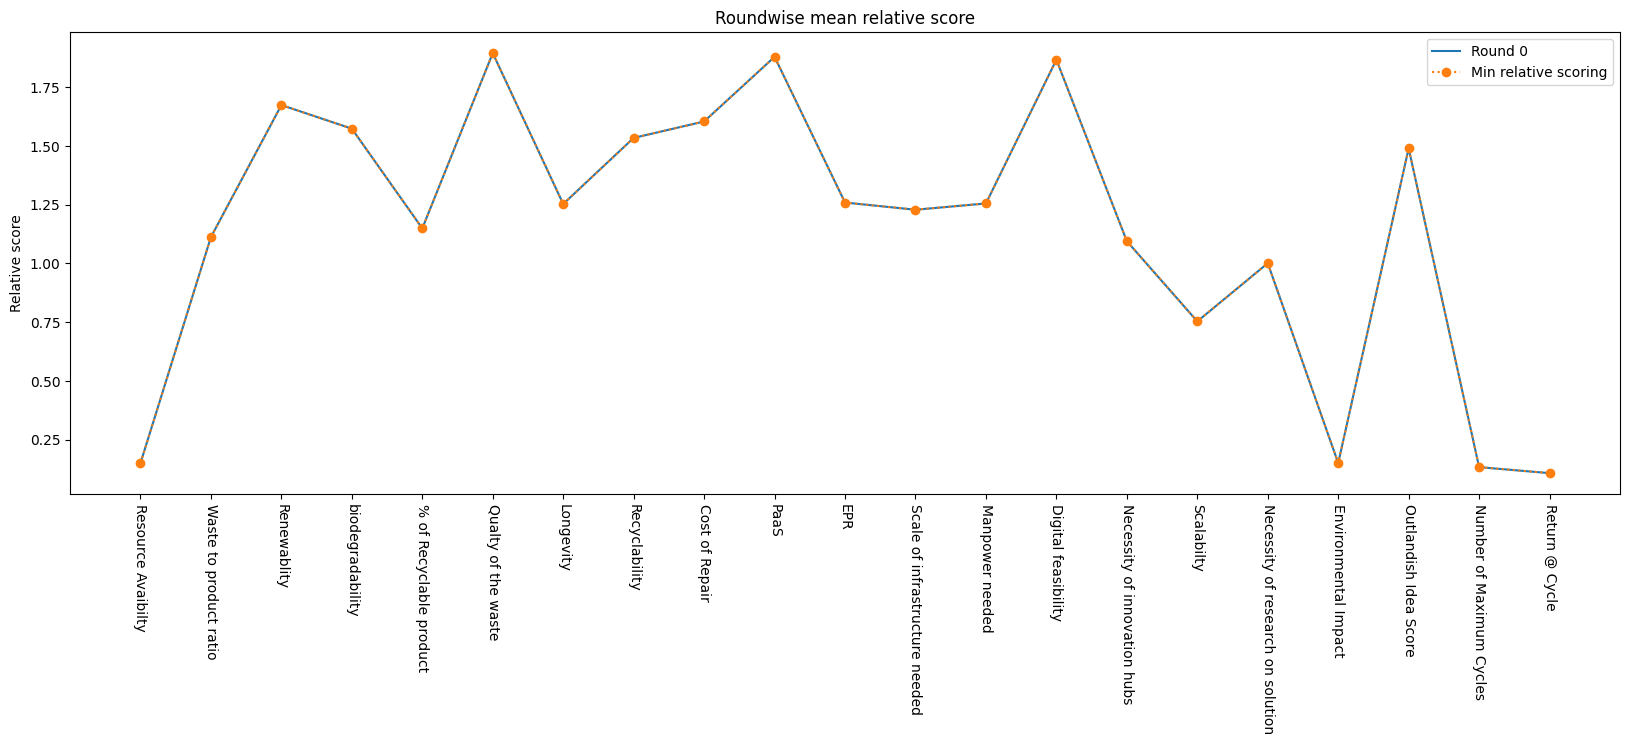

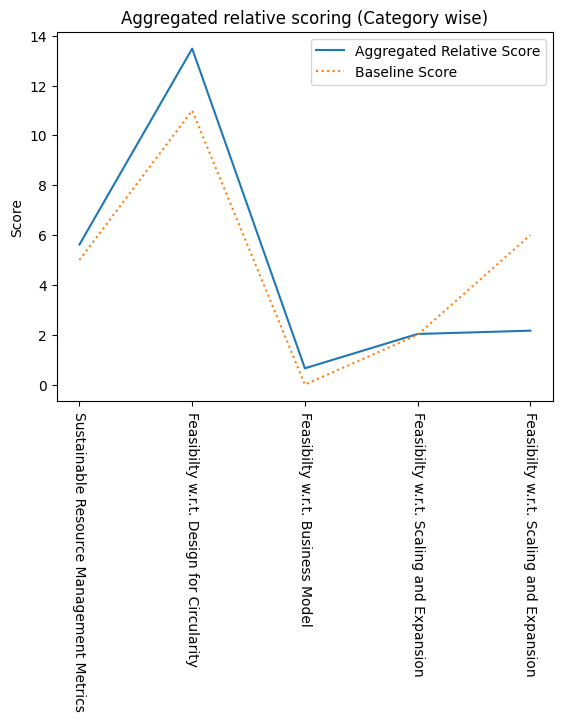

In [ ]:
if result_gen_flag:
  for round in range(max_judges):
    # Scores data
    c1,c2,c3,c4,c5 = gpt_scores_roundwise[round]
    student = stud_score_roundwise[round]
    # Create a list to hold all the scores
    all_scores = [c1, c2, c3, c4, c5, student]
    labels = ['gpt_sol1', 'gpt_sol2', 'gpt_sol3', 'gpt_sol4', 'gpt_sol5', 'student']

    # Define colors for each score set
    colors = ['blue', 'green', 'orange', 'cyan', 'gold', 'sky']

    # Create traces for each set of scores
    fig = go.Figure()
    for i, scores in enumerate(all_scores):
        if labels[i] == 'student':
            fig.add_trace(go.Bar(x=params, y=scores, name=labels[i], marker=dict(color='black')))
        else:
            fig.add_trace(go.Bar(x=params, y=scores, name=labels[i], marker=dict(color=colors[i])))

    # Update layout
    fig.update_layout(
        title=f'Scores Comparison for Each Parameter between gpt solutions  and student solution (JUDGING ROUND = {round})',
        xaxis_title='Parameters',
        yaxis_title='Scores',
        barmode='group',
    )

    # Show plot
    fig.show()



  plt.figure(figsize=(20,6))
  for data,label in zip(mean_paramwise_relativity_roundwise,[f"Round {i}" for i in range(max_judges)]):
    plt.plot(data,label=label)
  plt.title('Roundwise mean relative score')
  plt.plot(paramwise_min_relativity, linestyle=':', marker='o', label=f'Min relative scoring')
  plt.xticks(list(range(21)),params, rotation=-90)
  plt.ylabel('Relative score')
  plt.legend()
  plt.show()

  plt.plot(cat_rel_score,label='Aggregated Relative Score')
  plt.plot([5,11,0,2,6], linestyle=':',label='Baseline Score')
  plt.xticks([0,1,2,3,4],['Sustainable Resource Management Metrics', 'Feasibilty w.r.t. Design for Circularity', 'Feasibilty w.r.t. Business Model', 'Feasibilty w.r.t. Scaling and Expansion','Feasibilty w.r.t. Scaling and Expansion'], rotation=-90)
  plt.ylabel('Score')
  plt.legend()
  plt.title("Aggregated relative scoring (Category wise)")
  plt.show()

In [ ]:
# """
# params = [

#   Sustainable Resource Management Metrics
#     "Resource Avaibilty",             ->  +2
#     "Waste to product ratio",       ->   +2
#     "Renewablity",                      ->   +2
#     "biodegradability",                 ->   +1


#     Feasibilty w.r.t. Design for Circularity
#     "% of Recyclable product",     ->   +2
#     "Qualty of the waste",            -> +3
#     "Longevity",             ->  +2
#     "Recyclability",             ->  +3
#     "Cost of Repair",             ->  -1


#     Feasibilty w.r.t. Business Model
#     "PaaS",              ->  +1
#     "EPR",             ->  +1
#     "Scale of infrastructure needed",             ->  -1
#     "Manpower needed",             ->  -1


#     Feasibilty w.r.t. Scaling and Expansion
#     "Digital feasibility",      -> +1
#     "Necessity of innovation hubs",    ->  -1
#     "Scalabilty",  -> +3
#     "Necessity of research on solution",  -> -1

#     Feasibilty w.r.t. Others
#     "Environmental Impact",  -> +2
#     "Outlandish Idea Score",  -> +1
#     "Number of Maximum Cycles",  -> +2
#     "Return @ Cycle"  -> +1
# ]

# """